In [128]:
import pandas as pd
from datetime import timedelta
import datetime as dt
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [129]:
data = pd.read_csv('bedoccupancy.csv',
                   parse_dates=['ADMISSION_DATE_TIME', 'DISCHARGE_DATE_TIME'])

data = data.rename(columns={"Resident_Service.NAME": "residence", 
                     "ADMISSION_DATE_TIME": "ad_date_time",
                     "DISCHARGE_DATE_TIME": "dis_date_time"})

In [130]:
data.head()

,StudyID,residence,ad_date_time,dis_date_time
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00


## Length of Stay

In [131]:
data['los'] = data['dis_date_time']-data['ad_date_time']
data['los'] = data['los']/np.timedelta64(1,'h')

In [132]:
data.head()

,StudyID,residence,ad_date_time,dis_date_time,los
0,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,62.250000
1,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,402.266667
2,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,60.583333
3,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,84.700000
4,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,179.416667


In [133]:
data['idx'] = pd.to_datetime(data['ad_date_time'])
data = data.set_index('idx')
data.head()

,StudyID,residence,ad_date_time,dis_date_time,los
idx,,,,,
2014-04-01 02:15:00,458495,Internal Medicine B,2014-04-01 02:15:00,2014-04-03 16:30:00,62.250000
2014-04-01 04:21:00,1212197,Internal Medicine D,2014-04-01 04:21:00,2014-04-17 22:37:00,402.266667
2014-04-01 04:30:00,507244,Internal Medicine D,2014-04-01 04:30:00,2014-04-03 17:05:00,60.583333
2014-04-01 04:30:00,202030,Internal Medicine E,2014-04-01 04:30:00,2014-04-04 17:12:00,84.700000
2014-04-01 07:50:00,460987,Internal Medicine C,2014-04-01 07:50:00,2014-04-08 19:15:00,179.416667


In [134]:
residences = np.sort( list(set(data['residence'].values)))
cmap = cm.RdPu
colors = np.linspace(0.25,1, len(residences))

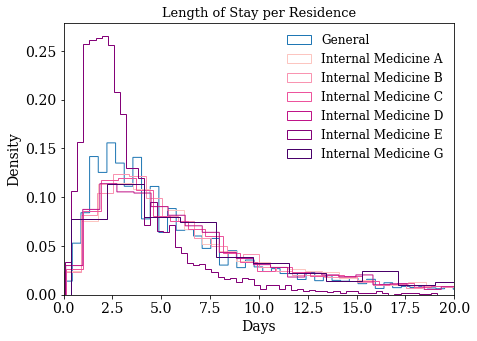

In [135]:
plt.figure(figsize=(7,5))
y = data['los'].values
plt.hist(y/24, histtype='step', bins='fd', density=1, label='General')
for residence, color in zip(residences,colors):
    y = data['los'][data['residence']==residence].values
    plt.hist(y/24, histtype='step', bins='fd', density=1, 
             color=cmap(color), label='%s'%residence)
    
#plt.yscale('log')
plt.xlim([0,20])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', frameon=0, fontsize=12)
plt.title('Length of Stay per Residence', fontsize=13)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig('los.png',bbox_inches='tight')
plt.show()

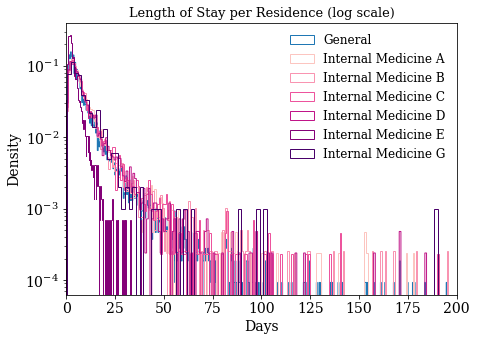

In [136]:
plt.figure(figsize=(7,5))
y = data['los'].values
plt.hist(y/24, histtype='step', bins='fd', density=1, label='General')
for residence, color in zip(residences,colors):
    y = data['los'][data['residence']==residence].values
    plt.hist(y/24, histtype='step', bins='fd', density=1, 
             color=cmap(color), label='%s'%residence)
    
plt.yscale('log')
plt.xlim([0,200])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', frameon=0, fontsize=12)
plt.title('Length of Stay per Residence (log scale)', fontsize=13)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.savefig('los_logscale.png',bbox_inches='tight')
plt.show()

In [137]:
data['ad_time'] = data['ad_date_time'].dt.time
data['dis_time'] = data['dis_date_time'].dt.time

In [138]:
data['ad_dow'] = data['ad_date_time'].dt.dayofweek
data['dis_dow'] = data['dis_date_time'].dt.dayofweek

## Time of admission and discharge per day

In [139]:
ad_time_values = data['ad_time'].values
ad_dow_values = data['ad_dow'].values

dis_time_values = data['dis_time'].values
dis_dow_values = data['dis_dow'].values

In [140]:
weekdays = np.arange(0,8,1)
hours = np.arange(0,25,1)

In [141]:
ad_time_values_float = np.array([])
dis_time_values_float = np.array([])

for adtime,distime in zip(ad_time_values, dis_time_values):
    adaux = adtime.hour+adtime.minute/60
    ad_time_values_float = np.append(ad_time_values_float, adaux)
    disaux = distime.hour+distime.minute/60
    dis_time_values_float = np.append(dis_time_values_float, disaux)

In [142]:
adH, adhours, adweekdays = np.histogram2d(ad_time_values_float, ad_dow_values, 
                                    bins=(hours,weekdays))
adH=adH.T

disH, dishours, disweekdays = np.histogram2d(dis_time_values_float, dis_dow_values, 
                                    bins=(hours,weekdays))
disH=disH.T

In [143]:
#X, Y = np.meshgrid(hours, weekdays)
#plt.pcolormesh(X,Y,H)

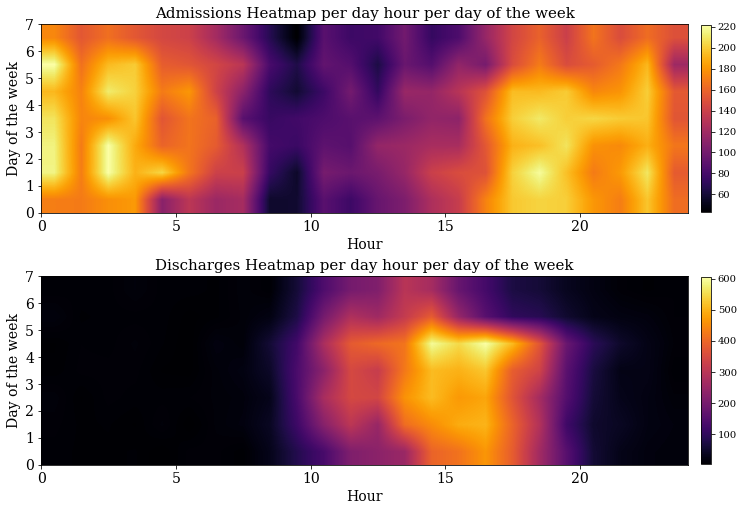

In [144]:
plt.figure(figsize=(12,8.5))

plt.subplot(2,1,1)
plt.imshow(adH, interpolation='bilinear', origin='low',
        extent=[adhours[0], adhours[-1], adweekdays[0], adweekdays[-1]], cmap=cm.inferno)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Day of the week', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(fraction=0.014, pad=0.02)
plt.title('Admissions Heatmap per day hour per day of the week',
         fontsize=15)



plt.subplot(2,1,2)
plt.imshow(disH, interpolation='bilinear', origin='low',
        extent=[dishours[0], dishours[-1], disweekdays[0], disweekdays[-1]], 
           cmap=cm.inferno)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Day of the week', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(fraction=0.014, pad=0.02)
plt.title('Discharges Heatmap per day hour per day of the week',
         fontsize=15)


plt.savefig('admission_discharges_heatmap.png', bbox_inches='tight')
plt.show()

In [145]:
ad_sunday = data['ad_time'][data['ad_dow']  == 6].values
ad_saturday = data['ad_time'][data['ad_dow']  == 5].values
ad_weekday = data['ad_time'][data['ad_dow'] < 5].values

dis_sunday = data['dis_time'][data['dis_dow']  == 6].values
dis_saturday = data['dis_time'][data['dis_dow']  == 5].values
dis_weekday = data['dis_time'][data['dis_dow'] < 5].values

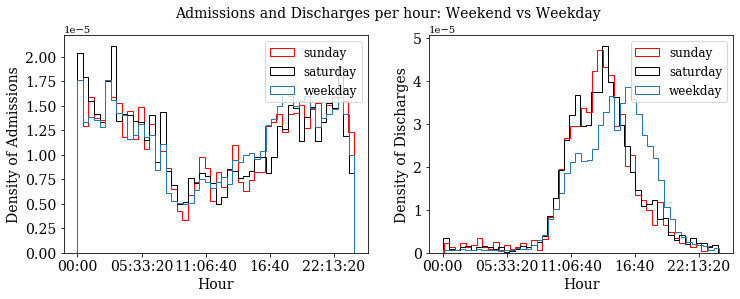

In [146]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(ad_sunday, histtype='step', bins=50, density=1, color='red', label = 'sunday')
plt.hist(ad_saturday, histtype='step', bins=50, density=1, color='k', label = 'saturday')
plt.hist(ad_weekday, histtype='step', bins=50, density=1, color='C0', label= 'weekday')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Density of Admissions', fontsize=14)
plt.legend(loc='best', frameon=1, fontsize=12)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.subplot(1,2,2)
plt.hist(dis_sunday, histtype='step', bins=50, density=1, color='red', label = 'sunday')
plt.hist(dis_saturday, histtype='step', bins=50, density=1, color='k', label = 'saturday')
plt.hist(dis_weekday, histtype='step', bins=50, density=1, color='C0', label= 'weekday')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Density of Discharges', fontsize=14)
plt.legend(loc='best', frameon=1, fontsize=12)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


plt.suptitle('Admissions and Discharges per hour: Weekend vs Weekday', fontsize=14)
plt.savefig('admissions_discharges_histogram.png', bbox_inches='tight')
plt.show()

## Admission and discharge correlation

In [147]:
xedges = np.arange(0,25,1)
yedges = np.arange(0,25,1)

In [148]:
H, xedges, yedges = np.histogram2d(ad_time_values_float,dis_time_values_float,
                                  bins=(xedges,yedges))
H=H.T

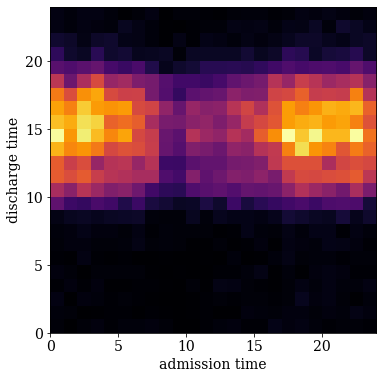

In [149]:
plt.figure(figsize=(6,6))
plt.imshow(H,  interpolation='nearest', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
           cmap=cm.inferno)
plt.xlabel('admission time', fontsize=14)
plt.ylabel('discharge time', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('ad_dis_correlation.png', bbox_inches='tight')
plt.show()

## Time of admission and discharge per day

In [151]:
residences_string = data['residence'].values
residence_string_to_float = np.arange(0,len(residences),1)

In [152]:
residences_float = np.zeros(len(residences_string))
for residence, encoder in zip(residences, residence_string_to_float):
    residences_float[residences_string == residence] = encoder

In [155]:
residence_bins = np.arange(0,len(residences), 1)

In [156]:
adH, adhours, r_bins = np.histogram2d(ad_time_values_float, residences_float, 
                                    bins=(hours,residence_bins))
adH=adH.T

disH, dishours, r_bins = np.histogram2d(dis_time_values_float, residences_float, 
                                    bins=(hours,residence_bins))
disH=disH.T

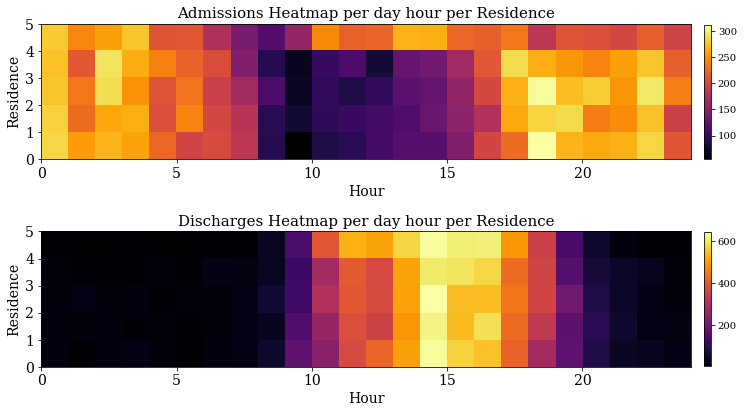

In [162]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.imshow(adH, interpolation='nearest', origin='low',
        extent=[adhours[0], adhours[-1], r_bins[0], r_bins[-1]], 
           cmap=cm.inferno)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Residence', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(fraction=0.010, pad=0.02)
plt.title('Admissions Heatmap per day hour per Residence',
         fontsize=15)



plt.subplot(2,1,2)
plt.imshow(disH, interpolation='nearest', origin='low',
        extent=[dishours[0], dishours[-1], r_bins[0], r_bins[-1]], 
           cmap=cm.inferno)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Residence', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.colorbar(fraction=0.010, pad=0.02)
plt.title('Discharges Heatmap per day hour per Residence',
         fontsize=15)


plt.savefig('admission_discharges_per_residence_heatmap.png', bbox_inches='tight')
plt.show()